In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [2]:
df = pd.read_csv("C:\\UniProjects\\DataSci\\final\\data\\1-data-engineered.csv")
df.set_index('timestamp', inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,413845,413877,413878,414284,414694,hour,dayofweek,week,month,is_holiday
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.841667,0.709302,0.953704,0.822581,0.813889,0.716216,0.855932,0.887755,0.818182,0.923077,...,0.715278,0.833333,0.893333,0.901961,0.869565,0,6,52,1,True
2017-01-01 00:05:00,0.858333,0.709302,0.956790,0.826613,0.811111,0.716216,0.855932,0.867347,0.790909,0.879121,...,0.715278,0.802083,0.866667,0.872549,0.804348,0,6,52,1,True
2017-01-01 00:10:00,0.858333,0.709302,0.944444,0.822581,0.811111,0.648649,0.855932,0.867347,0.763636,0.857143,...,0.715278,0.770833,0.866667,0.843137,0.858696,0,6,52,1,True
2017-01-01 00:15:00,0.816667,0.709302,0.947531,0.846774,0.805556,0.729730,0.847458,0.857143,0.736364,0.857143,...,0.715278,0.812500,0.866667,0.872549,0.826087,0,6,52,1,True
2017-01-01 00:20:00,0.866667,0.709302,0.944444,0.850806,0.802778,0.756757,0.826271,0.857143,0.754545,0.857143,...,0.715278,0.791667,0.866667,0.892157,0.858696,0,6,52,1,True


In [3]:
df_meta = pd.read_csv("C:\\UniProjects\\DataSci\\final\\data\\0-data-preprocessed-meta.csv")
df_meta.set_index('sensor_id', inplace=True)
df_meta.head()

,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4
sensor_id,,,,,,,,,,,,,,,,,
400649,17,N,4,85,44112.0,9.06,21.613,37.251741,-121.958118,0.850,ML,2,LARK AVE,DT185,L2-N-37-017-00906,998009,417770
400715,17,N,4,85,44112.0,9.4,21.953,37.256205,-121.955355,0.245,ML,2,SB 85 rm-n-conn,DT244,L2-N-37-017-00940,998013,417774
400240,17,N,4,85,44112.0,9.55,22.103,37.258184,-121.953853,0.535,ML,3,NB 85 rm-n-conn,DT260,L3-N-37-017-00955,998017,420767
403329,17,N,4,85,10340.0,10.47,23.023,37.270267,-121.947353,0.510,ML,3,Camden ave rm-n-loop,DTB25,L3-N-37-017-01047,997278,430594
400436,17,N,4,85,10340.0,10.57,23.123,37.271687,-121.947037,0.905,ML,3,Camden Ave rm-n-diag,DT267,l3-N-37-017-01057,998021,420772


### Resampling into different datasets
Hourly, Daily, Weekly and Monthly

In [4]:
df_hourly = df.resample('H').mean()
df_hourly.index=pd.to_datetime(df_hourly.index)
df_daily = df.resample('D').mean()
df_daily.index=pd.to_datetime(df_daily.index)
df_weekly = df.resample('W').mean()
df_weekly.index=pd.to_datetime(df_weekly.index)
df_monthly = df.resample('M').mean()
df_monthly.index=pd.to_datetime(df_monthly.index)

In [5]:
df_weekly.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,413845,413877,413878,414284,414694,hour,dayofweek,week,month,is_holiday
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.814005,0.738735,0.847383,0.785898,0.785368,0.767690,0.772584,0.834325,0.820549,0.777091,...,0.738016,0.792318,0.810556,0.835410,0.771928,11.5,6.0,52.0,1.0,1.000000
2017-01-08,0.681758,0.672521,0.689457,0.702155,0.572462,0.610555,0.667747,0.695356,0.687744,0.678144,...,0.657318,0.639013,0.620073,0.636555,0.567644,11.5,3.0,1.0,1.0,0.142857
2017-01-15,0.704861,0.701060,0.666285,0.628464,0.539633,0.643675,0.694699,0.728473,0.727128,0.711350,...,0.664255,0.657537,0.638565,0.699410,0.610707,11.5,3.0,2.0,1.0,0.000000
2017-01-22,0.696978,0.678796,0.666409,0.474342,0.544181,0.628834,0.693602,0.709007,0.690503,0.683785,...,0.616722,0.650050,0.641207,0.682768,0.597249,11.5,3.0,3.0,1.0,0.142857
2017-01-29,0.724458,0.726767,0.689879,0.505248,0.678928,0.657752,0.717796,0.723898,0.752886,0.741576,...,0.711881,0.685263,0.662927,0.713177,0.668791,11.5,3.0,4.0,1.0,0.000000


#### Function creation for plotting traffic
Different plots for hourly, daily and weekly 

In [6]:
def plot_daily_avg(sensor_id):
    '''
        Args:
            sensor_id: string, id of the plotted sensor
        Returns:
            plots the average traffic for each day of the week through the 6 month period
    '''
    plt.figure(figsize=(6, 4))
    plt.bar( df_daily['dayofweek'], df_daily[sensor_id])
    plt.ylabel('Traffic Flow')
    plt.xlabel('Day of Week')
    plt.title('Average Traffic per day of week for #' + sensor_id)
    plt.show()
    
def plot_weekly_avg(sensor_id):
    '''
        Args:
            sensor_id: string, id of the plotted sensor
        Returns:
            plots the average traffic for each week of the 6 month period 
    '''
    plt.figure(figsize=(6, 4))
    plt.bar( df_weekly['week'], df_weekly[sensor_id])
    plt.ylabel('Traffic Flow')
    plt.xlabel('Week of year')
    plt.title('Weekly Average Traffic for #'+sensor_id)
    plt.show()
    
def plot_hourly_avg(sensor_id):
    '''
        Args:
            sensor_id: string, id of the plotted sensor
        Returns:
            plots the average traffic for each week of the 6 month period 
    '''
    plt.figure(figsize=(6, 4))
    plt.bar( df_hourly['hour'], df_hourly[sensor_id])
    plt.ylabel('Traffic Flow')
    plt.xlabel('Hour of day (24h)')
    plt.title('Hourly Average Traffic for #'+sensor_id)
    plt.show()

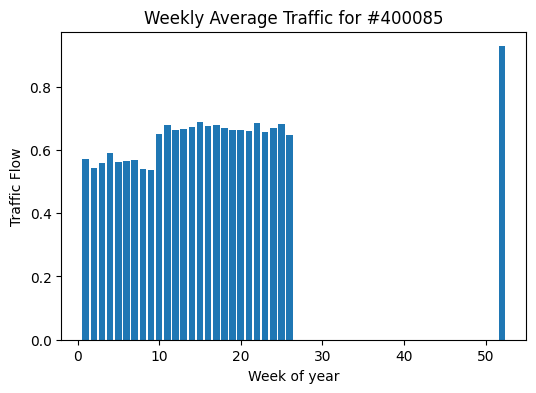

In [7]:
plot_weekly_avg('400085')

In [8]:
def plot_daily_data(sensor_id, timestart, timeend):
    '''
    Args:
        sensor_id: string with the sensor id tha needs to be plotted
        timestart: string with the stamp of the starting time to plot (year-month-day hour:minute:00)
        timeend: string with the stamp of the ending time to plot (year-month-day hour:minute:00)
    Returns:
        plot of the daily data collected by one sensor
    '''
    dateplt = datetime.strptime(timestart, '%Y-%m-%d %H:%M:%S')
    dateplt = dateplt.date()
    dateplt = str(dateplt)
    
    
    df[sensor_id].loc[(df.index > timestart) & (df.index < timeend)].plot(figsize=(10,6), color='#003366',title='Data for '+ dateplt)
    plt.xlabel('Hour of Day')
    plt.ylabel('Traffic Flow')
    plt.legend()
    plt.show()

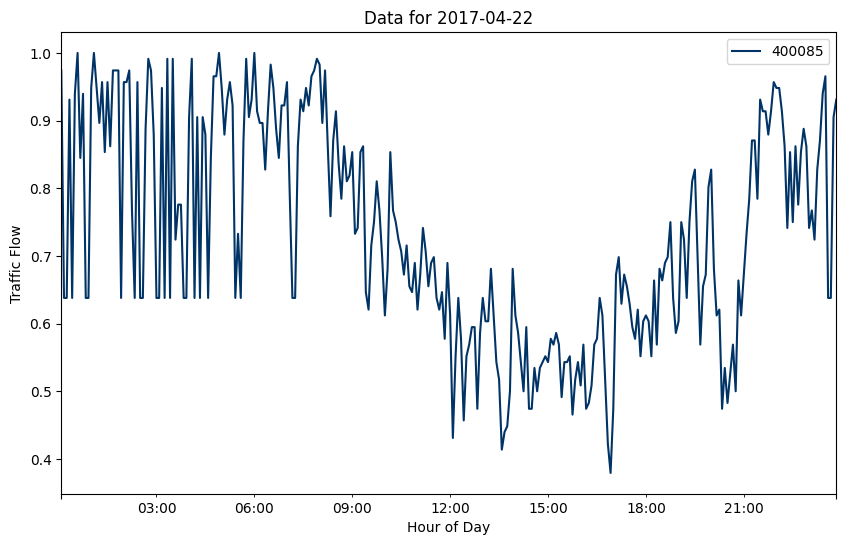

In [9]:
plot_daily_data('400085', '2017-04-22 00:00:00', '2017-04-22 23:55:00')

#### Heatmap function for each sensor

In [10]:
def plot_heatmap(sensor_id):
    '''
        Args: sensor_id: string, id of the loop detector we plot
        Returns:  heatmap of the traffic per hour of each day of the week
    '''
    #pivot table for heatmap
    heatdata = df.pivot_table(values=sensor_id, index=df.index.hour, columns=df.index.dayofweek)
    #plot
    plt.figure(figsize=(10,6))
    cax = plt.imshow(heatdata, cmap='coolwarm', aspect='auto')
    plt.colorbar(cax, label='Traffic Flow')
    plt.title('Traffic per hour for #'+sensor_id)
    plt.ylabel('Hour')
    plt.xlabel('Day of Week')
    plt.show()

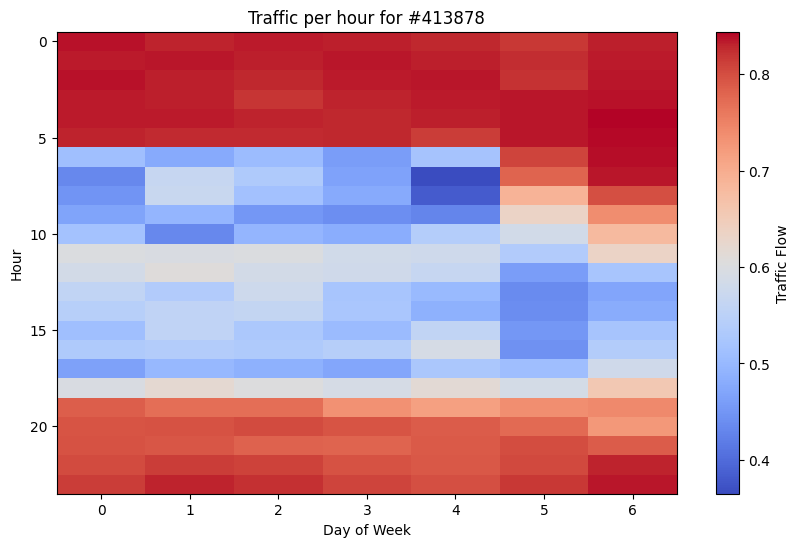

In [11]:
plot_heatmap('413878')

#### Autocorrelation & Partial Autocorrelation plots for each sensor

In [12]:
def plotacf(sensor_id):
    '''
        Args: sensor_id:string, id the loop detector we plot
        Returns: Autocorrelation plot for daily data
    '''
    plt.figure(figsize=(12, 6))
    acf_plot = plot_acf(df_daily[sensor_id], alpha=0.0005) 
    plt.title('Autocorrelation Function for #'+sensor_id)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

In [13]:
def plotpacf(sensor_id):
    '''
        Args: sensor_id:string, id the loop detector we plot
        Returns: Partial Autocorrelation plot for daily data
    '''
    plt.figure(figsize=(12, 6))
    pacf_plot = plot_pacf(df_daily[sensor_id], alpha=0.0005) 
    plt.title('Partial Autocorrelation Function for #'+sensor_id)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

<Figure size 1200x600 with 0 Axes>

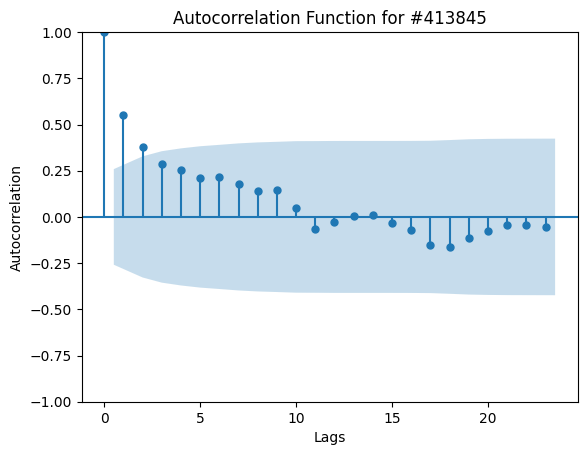

In [14]:
plotacf('413845')

<Figure size 1200x600 with 0 Axes>

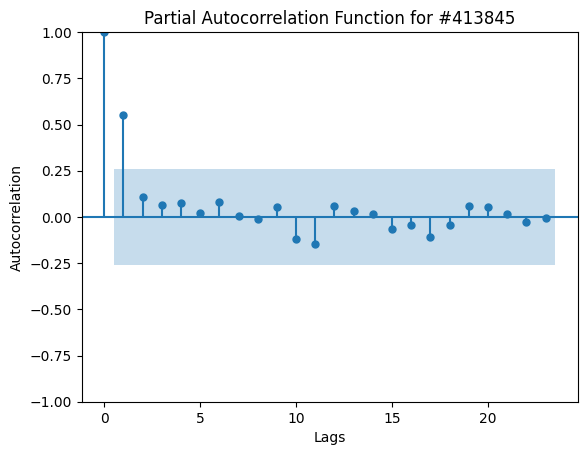

In [15]:
plotpacf('413845')

### Plotting differences between non-holiday vs holiday dates
For each sensor

#### Box Plot

In [16]:
 def plot_holiday_box(sensor_id):
    '''
        Args: sensor_id: string, id of the loop detector we plot
        Returns: Box plot of the traffic flow on holiday and non-holiday dates 
    '''
    holiday_data = df_daily[df_daily['is_holiday']==True]
    non_holiday_data = df_daily[df_daily['is_holiday']==False]

    plt.figure(figsize=(9,6))
    plt.boxplot([holiday_data[sensor_id], non_holiday_data[sensor_id]], labels=['Holiday', 'Non Holiday'])
    plt.title('Traffic Flow on holidays vs non-holidays for #'+sensor_id)
    plt.ylabel('Traffic Flow')
    plt.xlabel('Type of Day')
    plt.show()


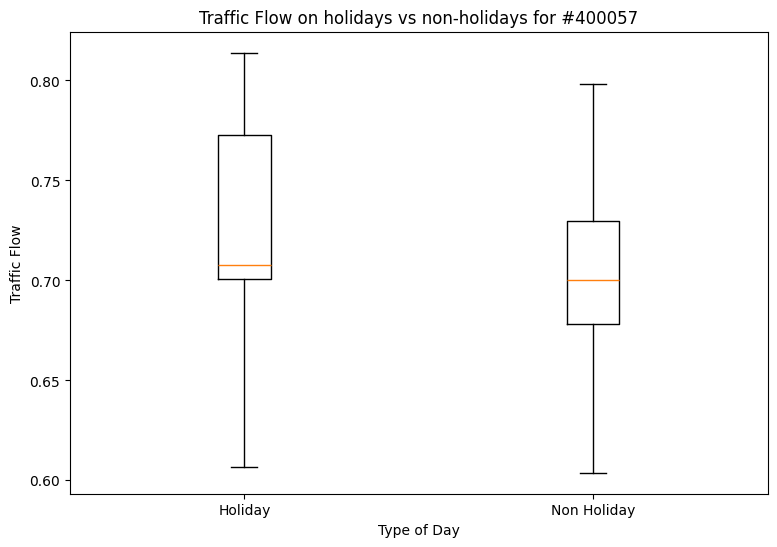

In [17]:
plot_holiday_box('400057')

#### Violin Plot

In [18]:
 def plot_violin(sensor_id):
    '''
        Args: sensor_id: string, id of the loop detector we plot
        Returns: Violin plot of the traffic flow on holiday and non-holiday dates
    '''
    sns.violinplot(x=df['is_holiday'].map({True: 'Holiday', False: 'Non-Holiday'}), y=df[sensor_id])
    plt.title('Traffic Flow Distribution on Holidays vs Non-Holidays for #'+sensor_id)
    plt.xlabel('Type of Day')
    plt.ylabel('Traffic Flow')
    plt.show()

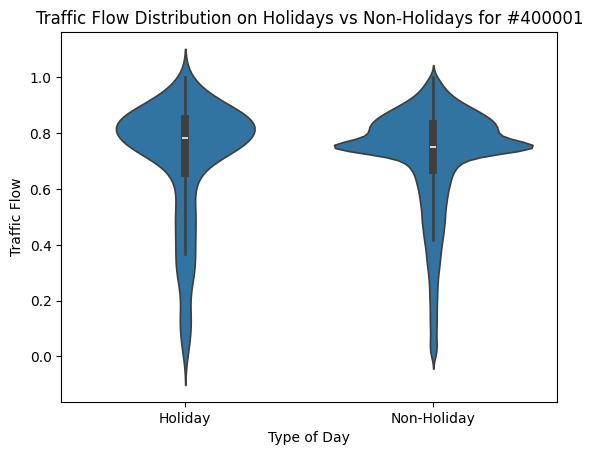

In [19]:
plot_violin('400001')

#### Kernel Density Plot | KDE

In [20]:
def plot_kde(sensor_id, df):
    '''
        Args: sensor_id : string, id of the loop detector we want to plot
              df: dataframe, either the stantard dataframe, the hourly or the daily
        Returns: Kernel Density Estimate Plot
    '''
    sns.kdeplot(df[df['is_holiday'] == True][sensor_id], label = 'Holiday', fill=True)
    sns.kdeplot(df[df['is_holiday'] == False][sensor_id], label = 'Non-Holiday', fill=True)
    plt.title('Traffic Flow Distribution on Holidays vs Non Holidays for #'+sensor_id)
    plt.ylabel('Density')
    plt.xlabel('Traffic Flow')
    plt.legend()
    plt.show()

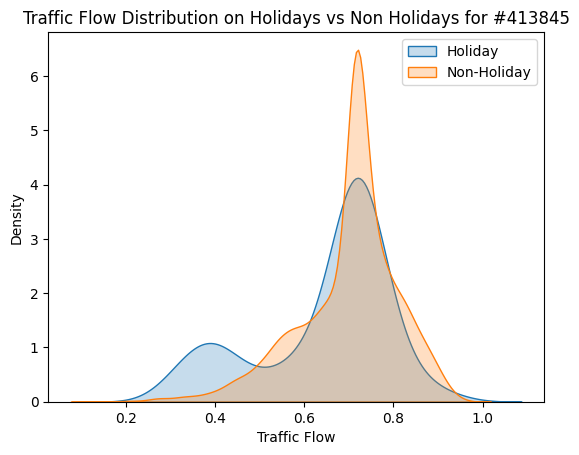

In [21]:
plot_kde('413845', df_hourly)